# Final Project
IST659: Introduction to Data Science

Health Management Organization data

Analysis of the dataset to see which predictors influence whether a person will be an "expensive" entity or not. Various factors might influence this decision and we will look at a few visuals, work on the data using predictive analysis to reach a conclusion for the management.

1. Data cleaning
2. Analyze all variables, use summary() and other functions to explore data
3. Make scatterplots and bar graphs, histograms
4. Identify significant predictors for the cost column
5. Add column 'expensive' and split data into training and test sets
6. Use 2-3 models and see which one is the best
7. Run stats on expensive column to see which variables affect these values
8. Build plots and graphs to visualize 'expensive' and explain why some people spend more than others (based on sevaral factors), and show maps

In [ ]:
#First, we have to import the libraries that we will be using for our initial
#reading of data, cleaning the data, and simple analysis.
library(tidyverse)

#We use the read_csv function to get the data and store it in the HMO_data variable.
HMO_data <- read_csv('https://intro-datascience.s3.us-east-2.amazonaws.com/HMO_data.csv')

Rows: 7582 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): smoker, location, location_type, education_level, yearly_physical, ...
dbl (6): X, age, bmi, children, hypertension, cost

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


# **1. Data Analysis and Cleaning**

---



In this section, we will figure out the data structure, it's attributes, the
type of variables in the columns, how they look like statistically (mean, mode, median, etc.), if they have any irregularities or null values, and fix those null values.

In [ ]:
#We will now have a look at the data to see the structures, identify any missing values.
dim(HMO_data)

#This dataset has 7582 rows (observations) and 14 columns (attributes).

[1] 7582   14

[1] 30653732

In [ ]:
#We will have a look at the data.
head(HMO_data)

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
1,18,27.900,0,yes,CONNECTICUT,Urban,Bachelor,No,Active,Married,0,female,1746
2,19,33.770,1,no,RHODE ISLAND,Urban,Bachelor,No,Not-Active,Married,0,male,602
3,27,33.000,3,no,MASSACHUSETTS,Urban,Master,No,Active,Married,0,male,576
4,34,22.705,0,no,PENNSYLVANIA,Country,Master,No,Not-Active,Married,1,male,5562
5,32,28.880,0,no,PENNSYLVANIA,Country,PhD,No,Not-Active,Married,0,male,836
7,47,33.440,1,no,PENNSYLVANIA,Urban,Bachelor,No,Not-Active,Married,0,female,3842


In [ ]:
#Let's look at the types of each variable.
str(HMO_data)

#There are 6 attributes that are of numerical type and 8 columns
#that are of type character (string).

spc_tbl_ [7,582 × 14] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X              : num [1:7582] 1 2 3 4 5 7 9 10 11 12 ...
 $ age            : num [1:7582] 18 19 27 34 32 47 36 59 24 61 ...
 $ bmi            : num [1:7582] 27.9 33.8 33 22.7 28.9 ...
 $ children       : num [1:7582] 0 1 3 0 0 1 2 0 0 0 ...
 $ smoker         : chr [1:7582] "yes" "no" "no" "no" ...
 $ location       : chr [1:7582] "CONNECTICUT" "RHODE ISLAND" "MASSACHUSETTS" "PENNSYLVANIA" ...
 $ location_type  : chr [1:7582] "Urban" "Urban" "Urban" "Country" ...
 $ education_level: chr [1:7582] "Bachelor" "Bachelor" "Master" "Master" ...
 $ yearly_physical: chr [1:7582] "No" "No" "No" "No" ...
 $ exercise       : chr [1:7582] "Active" "Not-Active" "Active" "Not-Active" ...
 $ married        : chr [1:7582] "Married" "Married" "Married" "Married" ...
 $ hypertension   : num [1:7582] 0 0 0 1 0 0 0 1 0 0 ...
 $ gender         : chr [1:7582] "female" "male" "male" "male" ...
 $ cost           : num [1:7582] 1746 602 576 5562 8

In [ ]:
#Next, we gather some statistical analysis of the variables.
summary(HMO_data)

#As we can see, each numerical variable has a mean, median, etc. Also, in this
#analysis, we see that bmi has 78 null values while hypertension has 80 null values.

       X                  age             bmi           children    
 Min.   :        1   Min.   :18.00   Min.   :15.96   Min.   :0.000  
 1st Qu.:     5635   1st Qu.:26.00   1st Qu.:26.60   1st Qu.:0.000  
 Median :    24916   Median :39.00   Median :30.50   Median :1.000  
 Mean   :   712602   Mean   :38.89   Mean   :30.80   Mean   :1.109  
 3rd Qu.:   118486   3rd Qu.:51.00   3rd Qu.:34.77   3rd Qu.:2.000  
 Max.   :131101111   Max.   :66.00   Max.   :53.13   Max.   :5.000  
                                     NA's   :78                     
    smoker            location         location_type      education_level   
 Length:7582        Length:7582        Length:7582        Length:7582       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                               

In [ ]:
#Let's see if the string columns have any null values.
nrow(HMO_data[is.na(HMO_data$smoker),])
nrow(HMO_data[is.na(HMO_data$location),])
nrow(HMO_data[is.na(HMO_data$location_type),])
nrow(HMO_data[is.na(HMO_data$education_level),])
nrow(HMO_data[is.na(HMO_data$yearly_physical),])
nrow(HMO_data[is.na(HMO_data$exercise),])
nrow(HMO_data[is.na(HMO_data$married),])
nrow(HMO_data[is.na(HMO_data$gender),])

#We see that there are no null values in any of the other columns.

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [ ]:
#Let's remove the NA values from bmi and hypertension.
#We will use the na_interpolation() function to achieve this.
#It is in the imputeTS package.
install.packages('imputeTS')
library(imputeTS)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘markdown’, ‘png’, ‘jpeg’, ‘quadprog’, ‘quantmod’, ‘gridtext’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’, ‘ggtext’, ‘stinepack’, ‘forecast’, ‘Rcpp’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [ ]:
#Before
print('Number of NA\'s Before')
nrow(HMO_data[is.na(HMO_data$bmi),])
nrow(HMO_data[is.na(HMO_data$hypertension),])

#Using na_interpolation() to remove null values from the two columns.
HMO_data$bmi <- na_interpolation(HMO_data$bmi)
HMO_data$hypertension <- na_interpolation(HMO_data$hypertension)

#After
print('Number of NA\'s After')
nrow(HMO_data[is.na(HMO_data$bmi),])
nrow(HMO_data[is.na(HMO_data$hypertension),])

[1] "Number of NA's Before"


[1] 78

[1] 80

[1] "Number of NA's After"


[1] 0

[1] 0

In [ ]:
#In this section we will remove the possible outliers. Assuming that the bottom and top 0.5% data contained in the distribution curve contains possible outliers

lower_bound <- quantile(HMO_data$cost, 0.005)
upper_bound <- quantile(HMO_data$cost, 0.995)
lower_bound #0.5th percentile of all data
upper_bound #99.5th percentile of all data
outliers <- which(HMO_data$cost < lower_bound | HMO_data$cost > upper_bound)

nrow(HMO_data[outliers,]) #number of outliers

HMO_data_new <- HMO_data[-outliers,]

0.5% 
79.81

99.5% 
27723.03

[1] 76

In [ ]:
#We now look at the summary statistics of the new dataset.
summary(HMO_data_new)

       X                  age             bmi           children   
 Min.   :        1   Min.   :18.00   Min.   :15.96   Min.   :0.00  
 1st Qu.:     5606   1st Qu.:26.00   1st Qu.:26.60   1st Qu.:0.00  
 Median :    24056   Median :39.00   Median :30.50   Median :1.00  
 Mean   :   714251   Mean   :38.87   Mean   :30.78   Mean   :1.11  
 3rd Qu.:   117688   3rd Qu.:51.00   3rd Qu.:34.66   3rd Qu.:2.00  
 Max.   :131101111   Max.   :66.00   Max.   :53.13   Max.   :5.00  
    smoker            location         location_type      education_level   
 Length:7506        Length:7506        Length:7506        Length:7506       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                              

# **2. Data Visualization**

---



In this section, we will attempt to look at some graphs and charts to get a better idea of the variables and how they are spread out. We will also look at some histograms, some bar charts, scatterplots, and even a map of the different states and regions to see how the cost of each individual's insurance policy varies.

In [ ]:
#In this section, we will try to visualize the patterns between categorical attributes with the cost attribute. Also, analyse the pattern of cost attribute

#Here we're using gridExtra package for arranging multiple graphs in one pane
install.packages("gridExtra")

library(gridExtra)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




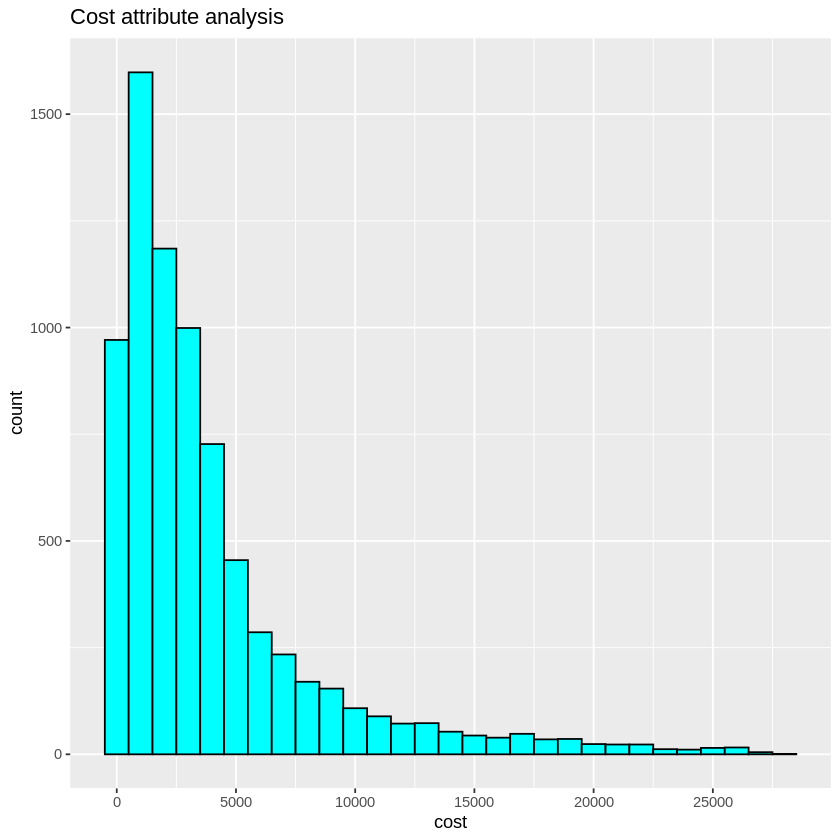

In [ ]:
ggplot(HMO_data_new) + geom_histogram(aes(x=cost), col='black', fill='cyan', binwidth = 1000) + ggtitle("Cost attribute analysis") + scale_x_continuous(breaks = seq(0, 50000, by = 5000))
#We can observe that most of the patients in the dataset are incurring costs in the range of $0-10000, with the graph showing a right-skewed pattern

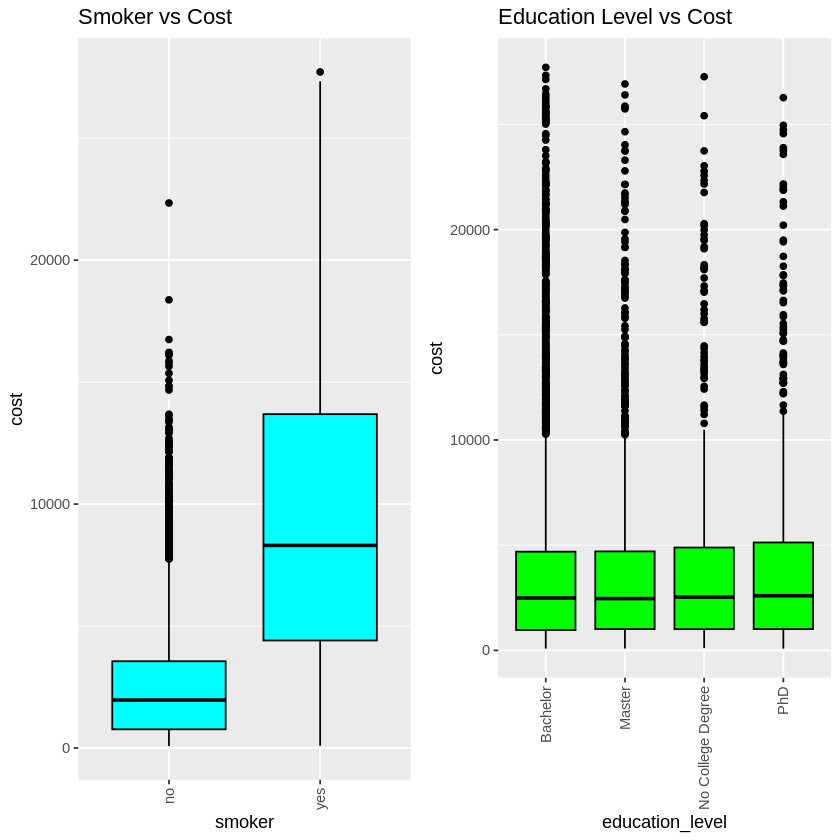

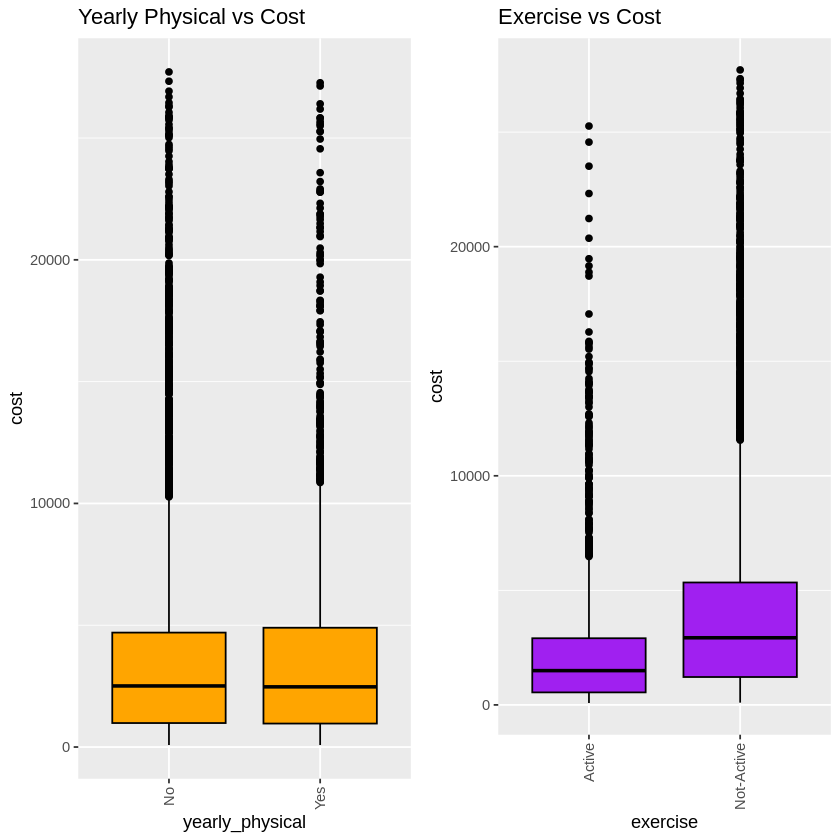

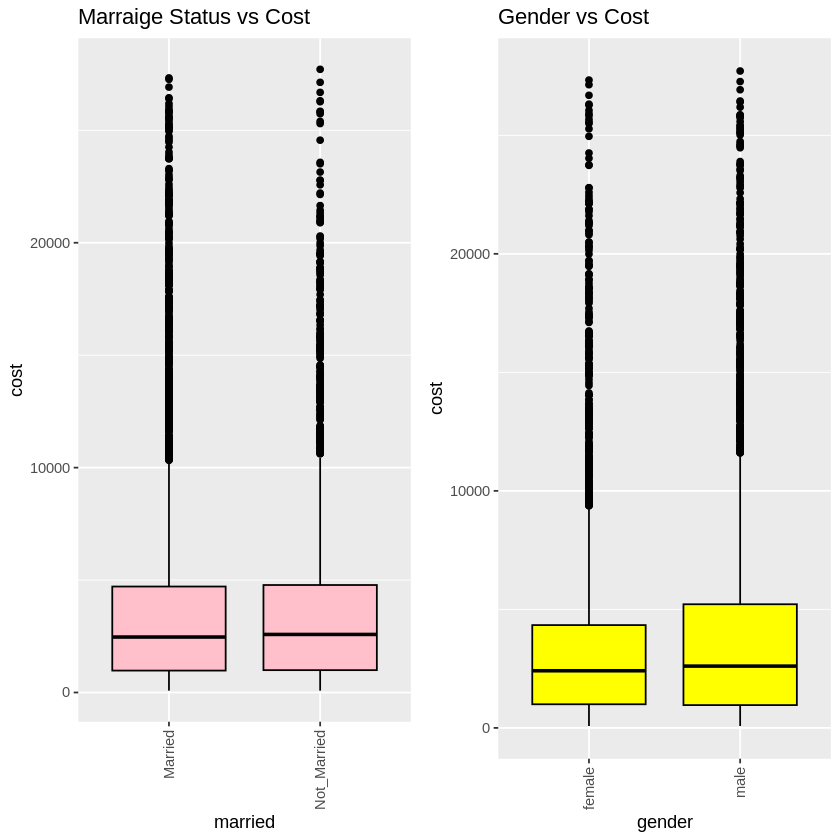

In [ ]:
#Plotting box-whisker plots to analyse the effect of each categorical attribute on the 'Cost' attribute
g1 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=smoker, y=cost), col="black", fill = 'cyan') + ggtitle("Smoker vs Cost")
g1 <- g1 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

g2 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=education_level, y=cost), col="black", fill = 'green', ) + ggtitle("Education Level vs Cost")
g2 <- g2 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

g3 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=yearly_physical, y=cost), col="black", fill = 'orange') + ggtitle("Yearly Physical vs Cost")
g3 <- g3 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

g4 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=exercise, y=cost), col="black", fill = 'purple') + ggtitle("Exercise vs Cost")
g4 <- g4 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

g5 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=married, y=cost), col="black", fill = 'pink') + ggtitle("Marraige Status vs Cost")
g5 <- g5 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

g6 <- ggplot(HMO_data_new) + geom_boxplot(aes(x=gender, y=cost), col="black", fill = 'yellow') + ggtitle("Gender vs Cost")
g6 <- g6 +  theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


grid.arrange(g1, g2, nrow=1)
grid.arrange(g3, g4, nrow=1)
grid.arrange(g5, g6, nrow=1)

#We can observe that for each attribute, there is a category for which the overall cost incurred by people is higher as compared to the other categories.
#Although, these graphs don't provide enough information about which of the attribute is most closely related with cost

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘maps’


The following object is masked from ‘package:purrr’:

    map




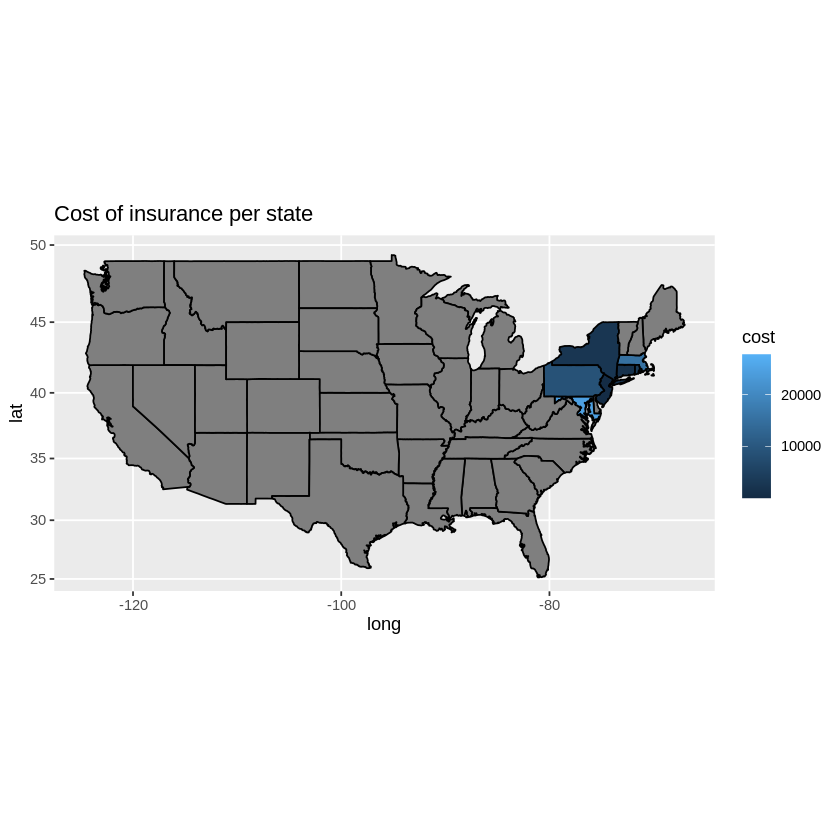

In [ ]:
#Map plot to analyse how various regions affect the cost expenditure of patients in the dataset

#We will plot a map of all the US states and have the color represent the cost of expenditure for each state.

#For this we will use the ggplot2 library

install.packages('ggplot2')
install.packages('dplyr')
install.packages('maps')
install.packages('mapproj')

library(ggplot2)
library(dplyr)
library(maps)
library(mapproj)

states <- map_data("state")
states$state_name <- tolower(states$region)
HMO_data_new$location <- tolower(HMO_data_new$location)
HMO_data_with_states <- merge(HMO_data_new, states, all.y=TRUE, by.x="location", by.y="region")

HMO_data_with_states <- HMO_data_with_states %>% arrange(order)

ggplot(HMO_data_with_states) + geom_polygon(color="black",
                 aes(x=long,y=lat,group=group,fill=cost)) +
        ggtitle('Cost of insurance per state') +
coord_map()

#As we can see, the dataset is limited to some of the northeastern states (7), and it shows the average
#cost per state of insurance. It is evident that Maryland has a higher average than other states.

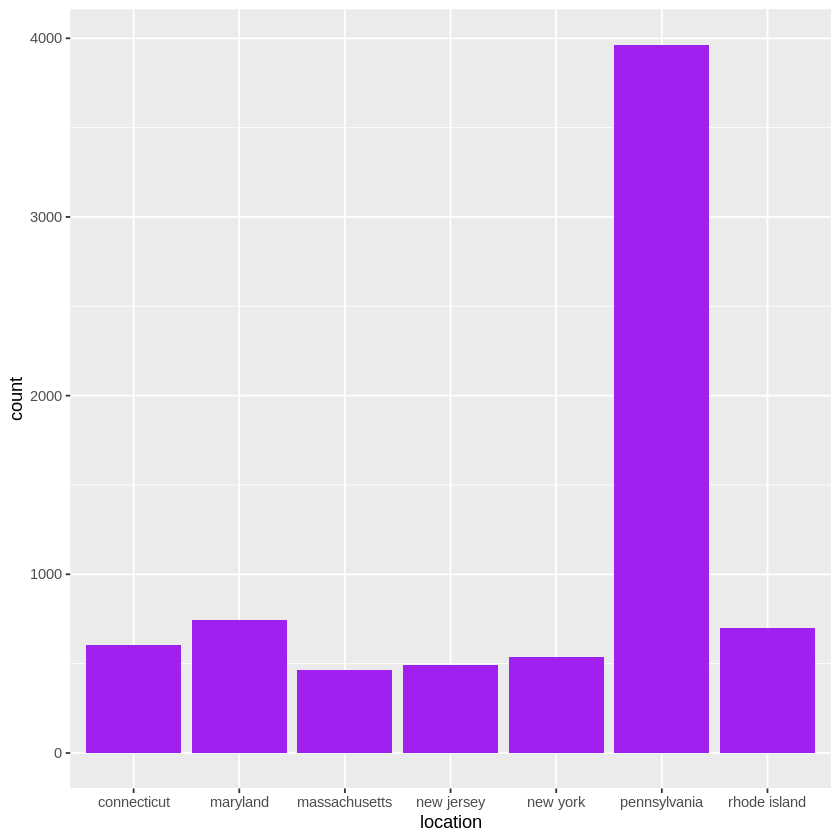

In [ ]:
#Creating a bar graph representing the count of people from different states.

countPlot <- ggplot(data = HMO_data_new) + aes(x=location) + geom_bar(fill='purple')
countPlot

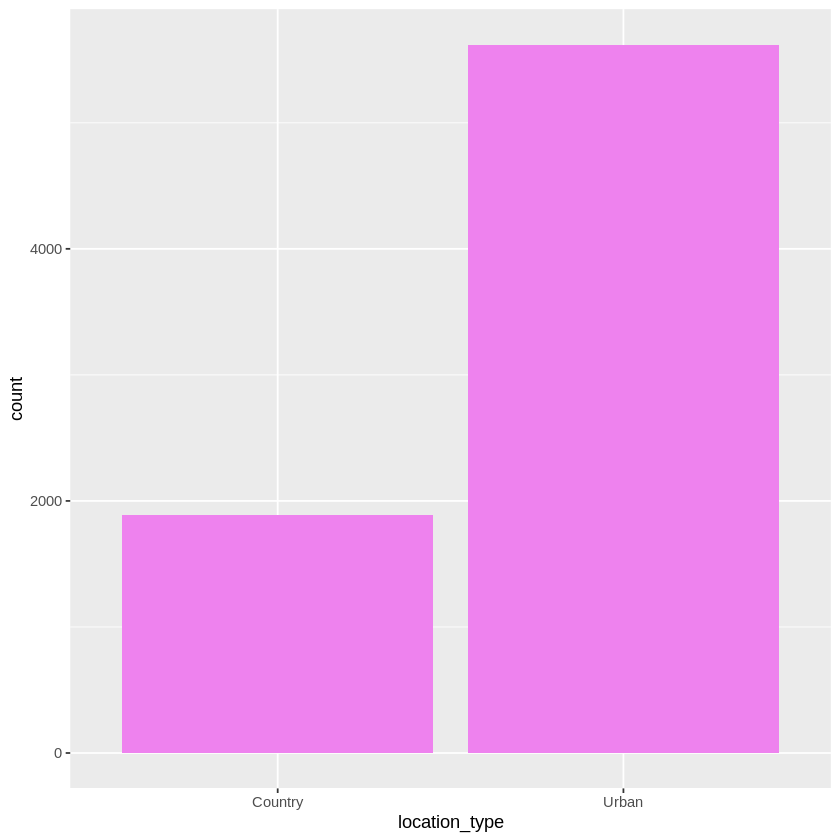

In [ ]:
#Creating a bar graph representing the count of people from urban or rural location types.

locationTypePlot <- ggplot(data = HMO_data_new) + aes(x=location_type) + geom_bar(fill='violet')
locationTypePlot

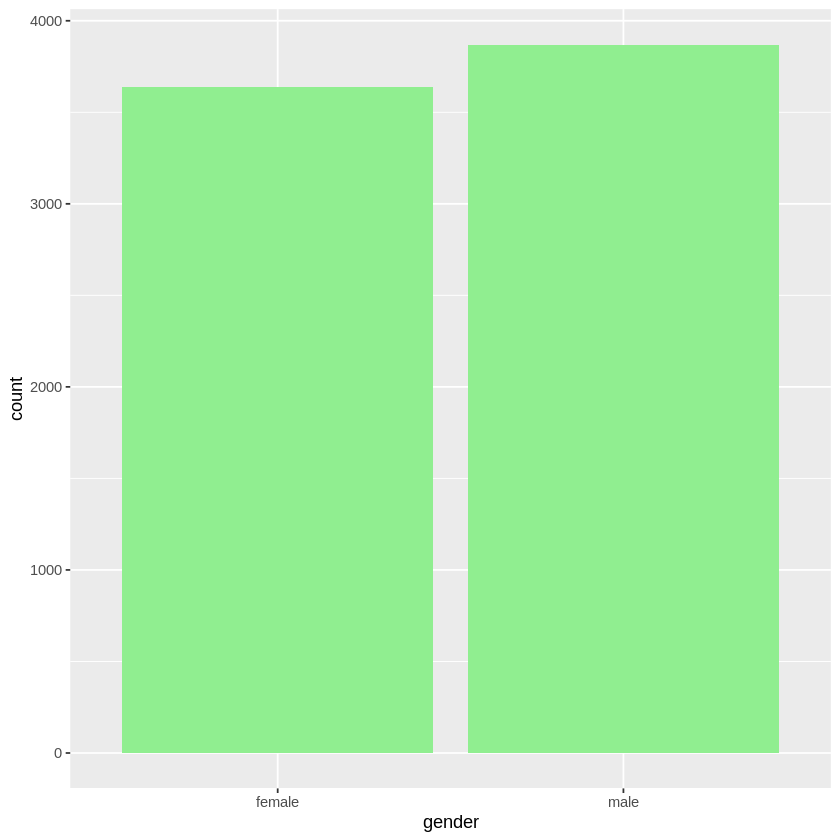

In [ ]:
#Creating a bar graph representing the distribution based on gender.

genderPlot <- ggplot(data = HMO_data_new) + aes(x=gender) + geom_bar(fill='lightgreen')
genderPlot

In [ ]:
#For the next visualization, we will create a new column in our dataframe based on the existing 'age' column.
#This column will divide our dataset into 4 age categories: '18-25', '26-40', '41-55', and '55+'.

HMO_data_new <- HMO_data_new %>% mutate(age_group =
                     case_when(age <= 25 ~ "18-25",
                               age <= 40 ~ "26-40",
                               age <= 55 ~ "41-55",
                               age >55 ~ "55+")
)

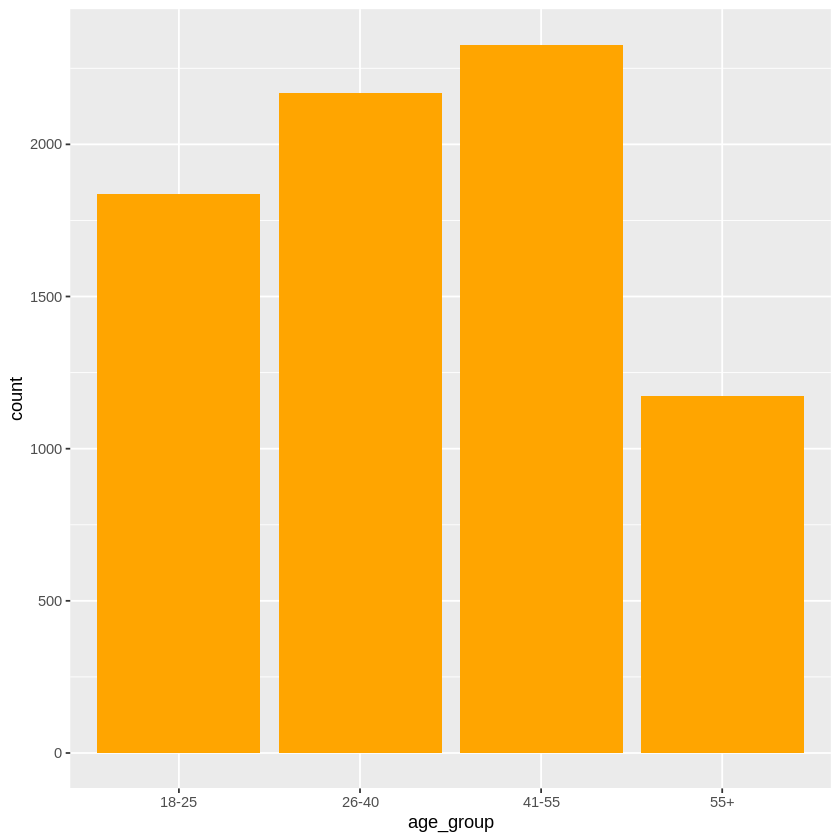

In [ ]:
#We will now look at how our dataset is divided based on the age groups.

ageGroupPlot <- ggplot(data = HMO_data_new) + aes(x=age_group) + geom_bar(fill='orange')
ageGroupPlot

# **3. Identifying significant predictors**

---
In this section, we will try to identify variables that have a significant impact on the cost variable. Firstly, we will visualize the relationship of multiple variables with cost variable using scatterplots. Then, we'll run regression models to study the dependancy of cost variables with multiple variables

`geom_smooth()` using formula = 'y ~ x'


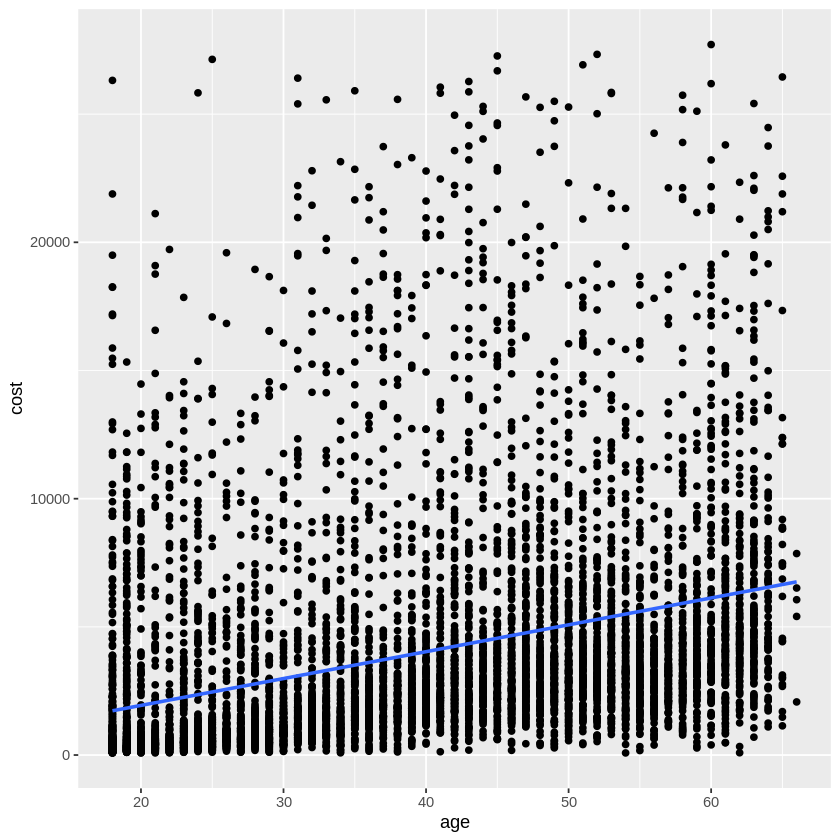

In [ ]:
#We can observte that there is a slight linear relationship between age and cost variables. Although, the age variable alone wouldn't be sufficient to predict the
#cost values accurately
ggplot(HMO_data_new, aes(x=age, y=cost)) + geom_point() + geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


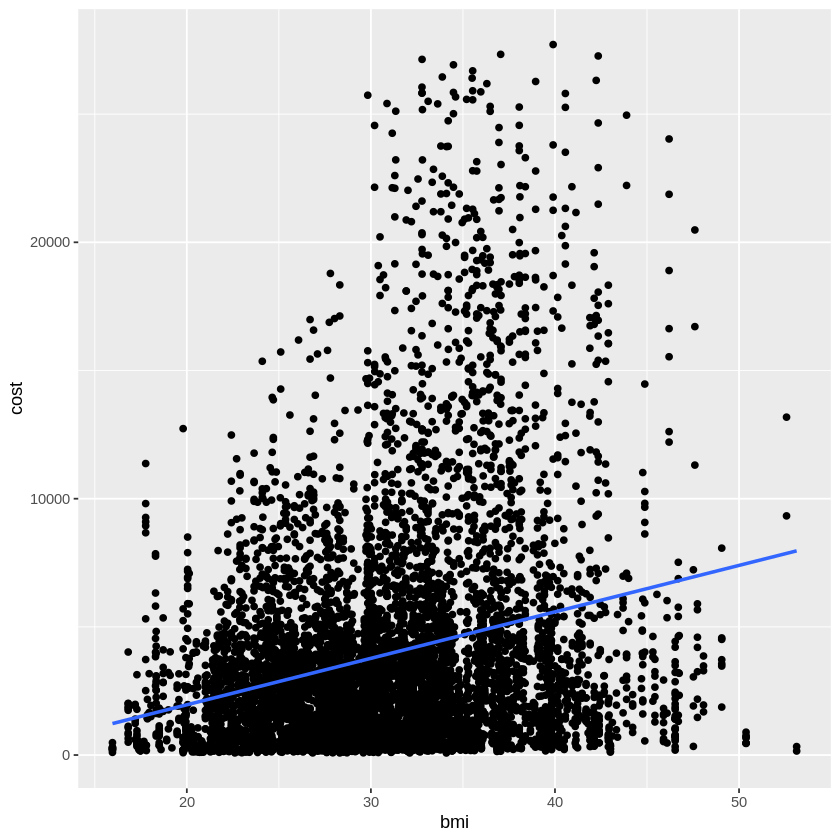

In [ ]:
#We can observte that there is a slight linear relationship between bmi and cost variables. Although, the bmi variable alone wouldn't be sufficient to predict the
#cost values accurately
ggplot(HMO_data_new, aes(x=bmi, y=cost)) + geom_point() + geom_smooth(method = "lm", se = FALSE)

## **4. Identifying the threshold cost value to generate Expensive attribute**

---
Here we will fixate on a cost value to create the expensive attribute column. Based on the statistical summary of the 'cost' attribute, we are picking the 3rd Quartile value for the cost column as the threshold value.


In [ ]:
lm_hmo1 <- lm(cost ~ age + smoker + exercise + bmi + hypertension + yearly_physical, data = HMO_data_new)
summary(lm_hmo1)
#Using linear regression model, we can predict the cost variable with almost 57% accuracy using the predictors such as age, smoker, exercise, bmi and hypertension.


Call:
lm(formula = cost ~ age + smoker + exercise + bmi + hypertension + 
    yearly_physical, data = HMO_data_new)

Residuals:
     Min       1Q   Median       3Q      Max 
-11516.7  -1411.3   -356.8    965.5  17558.5 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -8152.072    200.584 -40.642  < 2e-16 ***
age                   99.064      2.328  42.559  < 2e-16 ***
smokeryes           7155.439     83.439  85.756  < 2e-16 ***
exerciseNot-Active  2124.804     76.277  27.856  < 2e-16 ***
bmi                  166.570      5.524  30.151  < 2e-16 ***
hypertension         285.472     82.310   3.468 0.000527 ***
yearly_physicalYes   227.076     75.910   2.991 0.002786 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2846 on 7499 degrees of freedom
Multiple R-squared:  0.5927,	Adjusted R-squared:  0.5924 
F-statistic:  1819 on 6 and 7499 DF,  p-value: < 2.2e-16


In [ ]:
#Next, we set the threshold for a person to be termed as 'expensive' as the cost value greater
#than the 75th percentile cost value (4748.00). All other records will be viewed as 'non-expensive'
HMO_t_quar <- quantile(HMO_data_new$cost, 0.75)
HMO_data_new$expensive <- ifelse(HMO_data_new$cost >= HMO_t_quar, 1, 0)
head(HMO_data_new)

#Converting the expensive variable into two level factor variable to run regression on it
HMO_data_new$expensive <- as.factor(HMO_data_new$expensive)

75% 
4748

X,age,bmi,children,smoker,location,location_type,education_level,yearly_physical,exercise,married,hypertension,gender,cost,expensive,age_group
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
1,18,27.900,0,yes,connecticut,Urban,Bachelor,No,Active,Married,0,female,1746,0,18-25
2,19,33.770,1,no,rhode island,Urban,Bachelor,No,Not-Active,Married,0,male,602,0,18-25
3,27,33.000,3,no,massachusetts,Urban,Master,No,Active,Married,0,male,576,0,26-40
4,34,22.705,0,no,pennsylvania,Country,Master,No,Not-Active,Married,1,male,5562,1,26-40
5,32,28.880,0,no,pennsylvania,Country,PhD,No,Not-Active,Married,0,male,836,0,26-40
7,47,33.440,1,no,pennsylvania,Urban,Bachelor,No,Not-Active,Married,0,female,3842,0,41-55


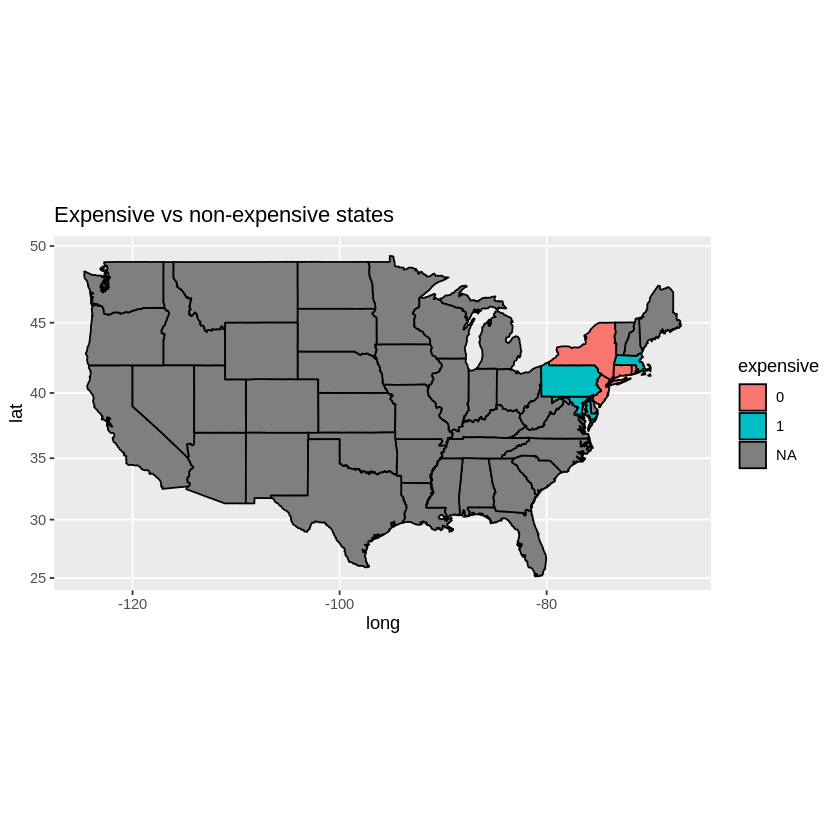

In [ ]:
#Here, we use maps to display the states as expensive/non-expensive based on overall state average.
HMO_data_new_with_states <- merge(HMO_data_new, states, all.y=TRUE, by.x="location", by.y="region")

HMO_data_new_with_states <- HMO_data_new_with_states %>% arrange(order)

ggplot(HMO_data_new_with_states) + geom_polygon(color="black",
                 aes(x=long,y=lat,group=group,fill=expensive)) +
        ggtitle('Expensive vs non-expensive states') +
coord_map()

# **5. Dividing the dataset into training and testing set**

---

We are dividing 70% of dataset into training data and 30% of dataset into testing data

In [ ]:
#In this section, we divide our dataset into training and testing data for further analysis.

install.packages('caret')
library('caret')
trainlist <- createDataPartition(y=HMO_data_new$cost, p=0.70, list=FALSE)
trainSet <- HMO_data_new[trainlist,]
testSet <- HMO_data_new[-trainlist,]

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



ERROR: ignored

In [ ]:
str(trainSet)

ERROR: ignored

In [ ]:
str(testSet)

# **6. Prediction analysis of Expensive variable using various models listed below:**



---


1. SVM
2. K-SVM
3. rpart






In [ ]:
#Now, we will use some models on our datasets to see which model fits the best on our data
#for future predictions.

#First, we will use the SVM model where we apply the 'svmRadial' method. This is the most popular
#and most commonly used method as this is similar to a Gaussian distribution.
install.packages('kernlab')
library('caret')

#Training the SVM model on our train dataset.
hmo_svm <- train(expensive ~. , data=trainSet, method = "svmRadial", trControl = trainControl(method = "none"), preProcess = c("center", "scale"))
hmo_svm

ERROR: ignored

In [ ]:
#We will now test the model by predicting values in our test dataset.
pred_out <- predict(hmo_svm, newdata=testSet)
conf_matrix <- table(pred_out, testSet$expensive)

#Confusion matrix of the prediction.
conf_matrix

In [ ]:
#As we see here, the error (1-accuracy) rate is ........................

error <- (sum(conf_matrix) - sum(diag(conf_matrix)))/sum(conf_matrix)
accuracy <- 1- error
accuracy

In [ ]:
#Here we use the confusionMatrix function from the caret package.
confusionMatrix(pred_out, testSet$expensive)

In [ ]:
# KSVM Model
#Second, we will use the K-SVM model. This is a Kernel-SVM approach. The difference here as
#compared to the normal SVM approach is that we specify the number of Kernels (points) that
#we will use closest to the current point to determine if they are similar or not for classification.
#This method uses the efficiency of SVM along with the accuracy of KNN (nearest neighbor) method.

library(kernlab)

#Training the model on train dataset
ksvmHMO <- ksvm(expensive ~ ., data=trainSet, C=5, cross=3, prob.model=TRUE)
ksvmHMO

In [ ]:
#Now we predict using the model on our test dataset.
ksvmPred <- predict(ksvmHMO, newdata=testSet)
ksvm_conf_matrix <- table(ksvmPred, testSet$expensive)
#Confusion Matrix
ksvm_conf_matrix

In [ ]:
#As we see, the accuracy for this model increased as compared to SVM. It is around ............

ksvmError <- (sum(ksvm_conf_matrix) - sum(diag(ksvm_conf_matrix)))/sum(ksvm_conf_matrix)
ksvmAccuracy <- 1- ksvmError
ksvmAccuracy

In [ ]:
#Using the confusionMatrix function to verify our result in the above block.
confusionMatrix(ksvmPred, testSet$expensive)

In [ ]:
#rpart

install.packages("rpart")
install.packages("rpart.plot")

library(rpart)
library(rpart.plot)

HMOtreeModel <- train(expensive ~ ., data=trainSet,  method="rpart")

In [ ]:
rpart.plot(HMOtreeModel$finalModel)

In [ ]:
rpartHMOPred <- predict(HMOtreeModel, testSet)
confusionrPartHMO <- confusionMatrix(rpartHMOPred, testSet$expensive)
confusionrPartHMO